In [1]:
# importing packages
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
# Features data
df1 = pd.read_csv(r"C:\Users\Happy\Desktop\Naren Baskar\final retail forecasting\Features_data_set (2).csv")
df1.head(3)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False


In [3]:
# sales data
df2 = pd.read_csv(r"C:\Users\Happy\Desktop\Naren Baskar\final retail forecasting\sales_data_set (2).csv")
df2.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False


In [4]:
# stores_data 
df3 = pd.read_csv(r"C:\Users\Happy\Desktop\Naren Baskar\final retail forecasting\stores_data_set (3).csv")
df3.head(3)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392


In [5]:
#merging sales and stores data
df4 = pd.merge(df2,df3,on='Store',how='inner')
df4

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,05/02/2010,24924.50,False,A,151315
1,1,1,12/02/2010,46039.49,True,A,151315
2,1,1,19/02/2010,41595.55,False,A,151315
3,1,1,26/02/2010,19403.54,False,A,151315
4,1,1,05/03/2010,21827.90,False,A,151315
...,...,...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False,B,118221
421566,45,98,05/10/2012,628.10,False,B,118221
421567,45,98,12/10/2012,1061.02,False,B,118221
421568,45,98,19/10/2012,760.01,False,B,118221


In [7]:
# merging df4 and feature data
df = pd.merge(df4,df1,on=['Store','Date'],how='inner')
df.head(1)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,05/02/2010,24924.5,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
 16  IsHoliday_y   421570 non-null  bool   
dtypes: bool(2), float64(10), int64(3), object(2)
mem

In [9]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)

In [10]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['week'] = df['Date'].dt.isocalendar().week



In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday_x   421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     150681 non-null  float64       
 10  MarkDown2     111248 non-null  float64       
 11  MarkDown3     137091 non-null  float64       
 12  MarkDown4     134967 non-null  float64       
 13  MarkDown5     151432 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

In [12]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,...,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,year,month,day,week
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,...,NaN,NaN,NaN,211.096358,8.106,False,2010,2,5,5
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,...,NaN,NaN,NaN,211.242170,8.106,True,2010,2,12,6
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,...,NaN,NaN,NaN,211.289143,8.106,False,2010,2,19,7
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,...,NaN,NaN,NaN,211.319643,8.106,False,2010,2,26,8
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,...,NaN,NaN,NaN,211.350143,8.106,False,2010,3,5,9


In [13]:
# now we want to drop the date column
df.drop(columns=['Date'],inplace=True)


In [14]:
df.head(2)

,Store,Dept,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,year,month,day,week
0,1,1,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2010,2,5,5
1,1,1,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,2010,2,12,6


In [15]:
df.isnull().sum()

Store                0
Dept                 0
Weekly_Sales         0
IsHoliday_x          0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
year                 0
month                0
day                  0
week                 0
dtype: int64

In [16]:
df.fillna(0,inplace=True)

In [17]:
df.isnull().sum()

Store           0
Dept            0
Weekly_Sales    0
IsHoliday_x     0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday_y     0
year            0
month           0
day             0
week            0
dtype: int64

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.0,11.0,22.0,33.0,45.0
Dept,421570.0,44.260317,30.492054,1.0,18.0,37.0,74.0,99.0
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.94,2079.65,7612.03,20205.8525,693099.36
Size,421570.0,136727.915739,60980.583328,34875.0,93638.0,140167.0,202505.0,219622.0
Temperature,421570.0,60.090059,18.447931,-2.06,46.68,62.09,74.28,100.14
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933,3.452,3.738,4.468
MarkDown1,421570.0,2590.074819,6052.385934,0.0,0.0,0.0,2809.05,88646.76
MarkDown2,421570.0,879.974298,5084.538801,-265.76,0.0,0.0,2.2,104519.54
MarkDown3,421570.0,468.087665,5528.873453,-29.1,0.0,0.0,4.54,141630.61
MarkDown4,421570.0,1083.132268,3894.529945,0.0,0.0,0.0,425.29,67474.85


In [19]:
df.drop(df[df['Weekly_Sales']<0].index,inplace=True)

In [20]:
df.drop(df[df['MarkDown2']<0].index,inplace=True)

In [21]:
df.drop(df[df['MarkDown3']<0].index,inplace=True)

In [22]:
df.drop(df[df['Temperature']<0].index,inplace=True)

In [23]:
df.describe().T   # temperature has negative values alse in real problem so no need change 

,count,mean,std,min,25%,50%,75%,max
Store,418660.0,22.199651,12.790081,1.0,11.0,22.0,33.0,45.0
Dept,418660.0,44.24384,30.508595,1.0,18.0,37.0,74.0,99.0
Weekly_Sales,418660.0,16027.102319,22726.505779,0.0,2116.4975,7658.065,20266.08,693099.36
Size,418660.0,136695.37326,61009.540433,34875.0,93638.0,140167.0,202505.0,219622.0
Temperature,418660.0,60.06217,18.440017,5.54,46.66,62.07,74.25,100.14
Fuel_Price,418660.0,3.359362,0.458406,2.472,2.931,3.452,3.735,4.468
MarkDown1,418660.0,2576.223052,6057.124707,0.0,0.0,0.0,2753.9,88646.76
MarkDown2,418660.0,882.194699,5086.067782,0.0,0.0,0.0,2.63,104519.54
MarkDown3,418660.0,470.476286,5544.253468,0.0,0.0,0.0,4.36,141630.61
MarkDown4,418660.0,1080.257751,3901.84559,0.0,0.0,0.0,415.36,67474.85


In [24]:
df.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday_x', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y', 'year',
       'month', 'day', 'week'],
      dtype='object')

In [25]:
df['IsHoliday_x'].replace({True:1,False:0},inplace=True)
df['IsHoliday_y'].replace({True:1,False:0},inplace=True)

In [26]:
df

,Store,Dept,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,year,month,day,week
0,1,1,24924.50,0,A,151315,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,0,2010,2,5,5
1,1,1,46039.49,1,A,151315,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,1,2010,2,12,6
2,1,1,41595.55,0,A,151315,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,0,2010,2,19,7
3,1,1,19403.54,0,A,151315,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,0,2010,2,26,8
4,1,1,21827.90,0,A,151315,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,0,2010,3,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,0,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,0,2012,9,28,39
421566,45,98,628.10,0,B,118221,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,0,2012,10,5,40
421567,45,98,1061.02,0,B,118221,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,0,2012,10,12,41
421568,45,98,760.01,0,B,118221,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,0,2012,10,19,42


In [27]:
df.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True)

In [28]:
df.drop(columns=['IsHoliday_y'],inplace=True)

In [29]:
df.head(1)

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,month,day,week
0,1,1,24924.5,0,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,2,5,5


In [30]:
df.head(1)

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,month,day,week
0,1,1,24924.5,0,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,2,5,5


In [31]:
# converting type columns into numerical columns
df['Type'].unique()

array(['A', 'B', 'C'], dtype=object)

In [32]:
df['Type'] =df['Type'].map({"A":1,"B":2,"C":3})

In [33]:
df.head()

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,month,day,week
0,1,1,24924.50,0,1,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,2,5,5
1,1,1,46039.49,1,1,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,2010,2,12,6
2,1,1,41595.55,0,1,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,2010,2,19,7
3,1,1,19403.54,0,1,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,2010,2,26,8
4,1,1,21827.90,0,1,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,2010,3,5,9


In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,418660.0,22.199651,12.790081,1.0,11.0,22.0,33.0,45.0
Dept,418660.0,44.24384,30.508595,1.0,18.0,37.0,74.0,99.0
Weekly_Sales,418660.0,16027.102319,22726.505779,0.0,2116.4975,7658.065,20266.08,693099.36
IsHoliday,418660.0,0.069968,0.255094,0.0,0.0,0.0,0.0,1.0
Type,418660.0,1.590061,0.666926,1.0,1.0,1.0,2.0,3.0
Size,418660.0,136695.37326,61009.540433,34875.0,93638.0,140167.0,202505.0,219622.0
Temperature,418660.0,60.06217,18.440017,5.54,46.66,62.07,74.25,100.14
Fuel_Price,418660.0,3.359362,0.458406,2.472,2.931,3.452,3.735,4.468
MarkDown1,418660.0,2576.223052,6057.124707,0.0,0.0,0.0,2753.9,88646.76
MarkDown2,418660.0,882.194699,5086.067782,0.0,0.0,0.0,2.63,104519.54


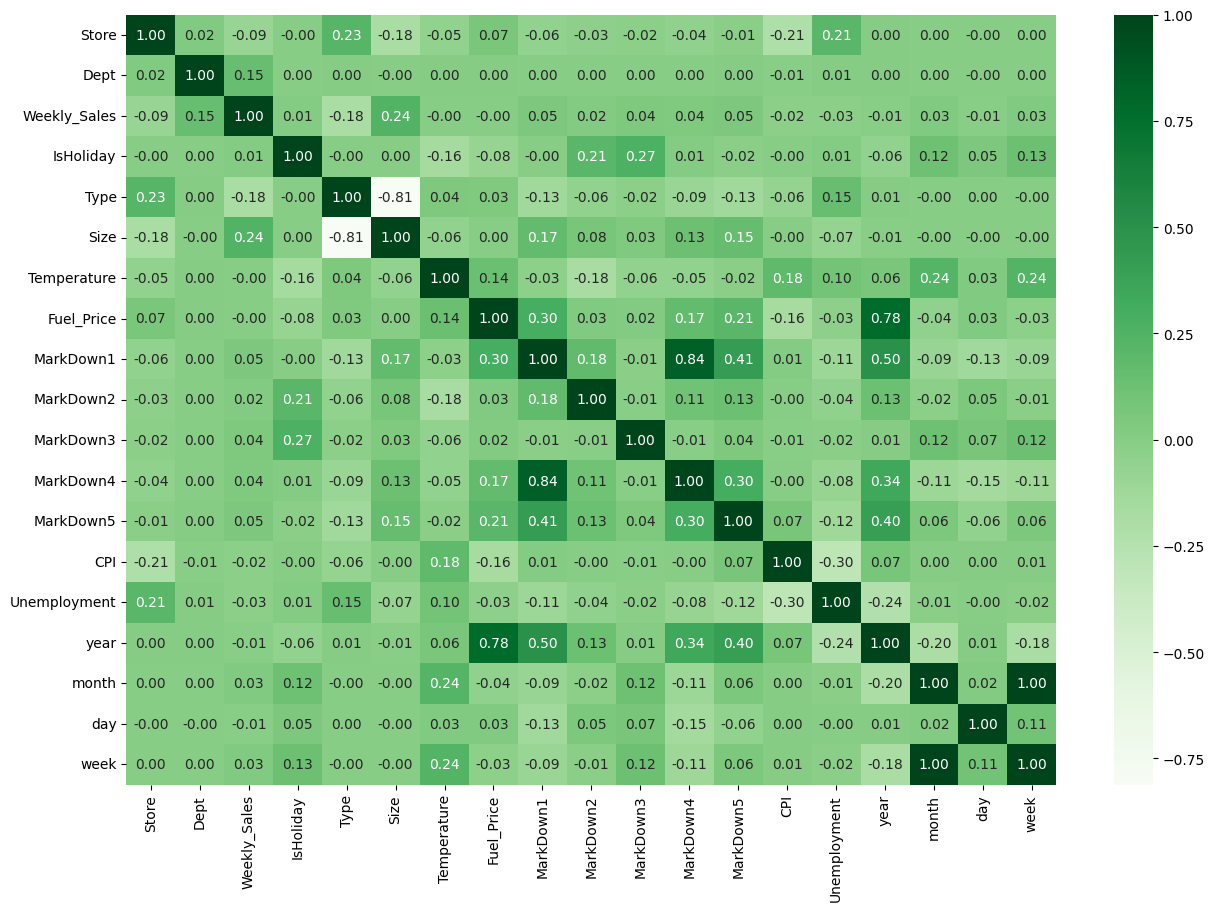

In [35]:
# Checking the Correlation using heatmap
df_corr= df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(df_corr,annot= True, cmap="Greens", fmt=".2f")
plt.show()

In [36]:
def plot(df, column):
    # Create a new figure
    plt.figure(figsize=(18, 6))

    # Displot equivalent: Histogram with KDE
    plt.subplot(1, 3, 1)
    sns.histplot(df[column], kde=True, bins=30, color='salmon')
    plt.title(f"Displot for {column}")

    # Histogram plot
    plt.subplot(1, 3, 2)
    sns.histplot(df[column], kde=True, bins=30, color='salmon')
    plt.title(f"Histogram plot for {column}")

    # Box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(x=df[column])
    plt.title(f"Box plot for {column}")

    plt.tight_layout()
    plt.show()

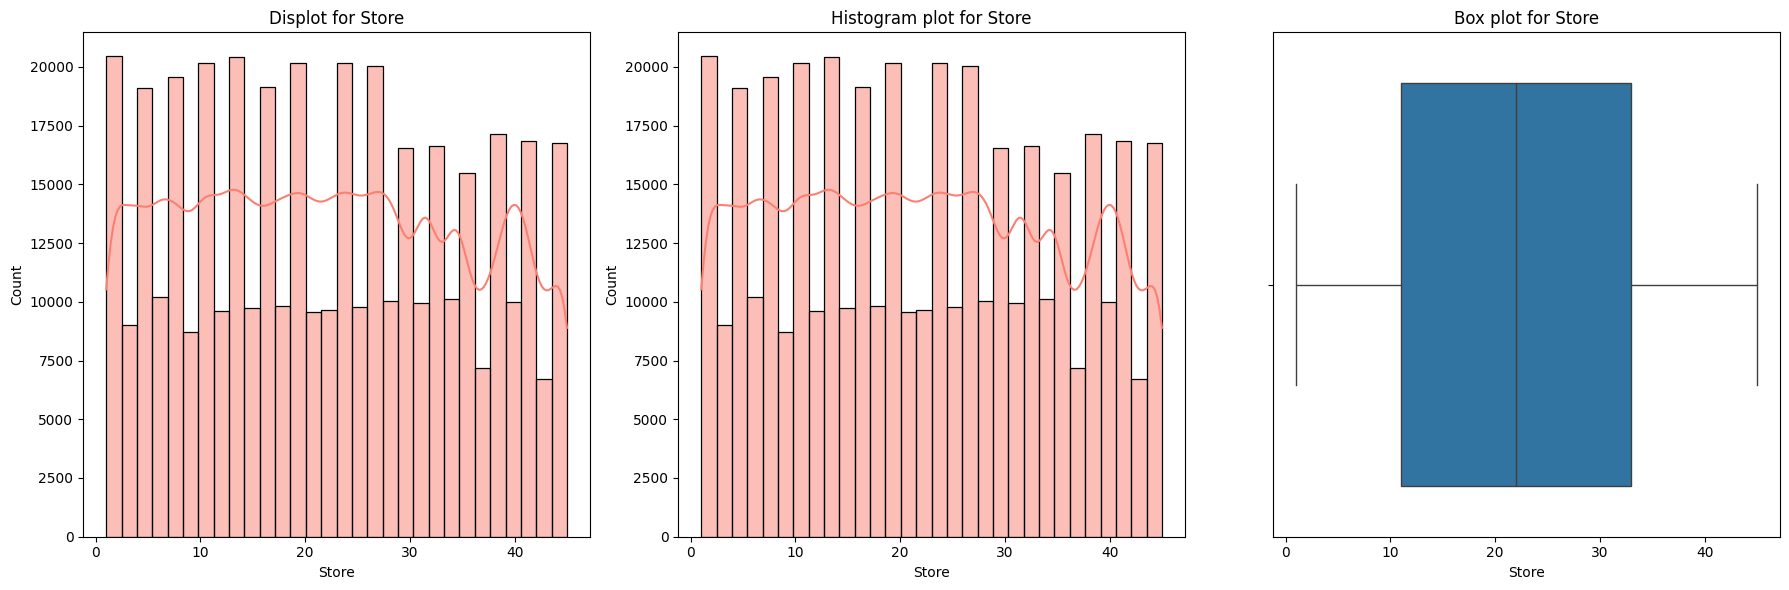

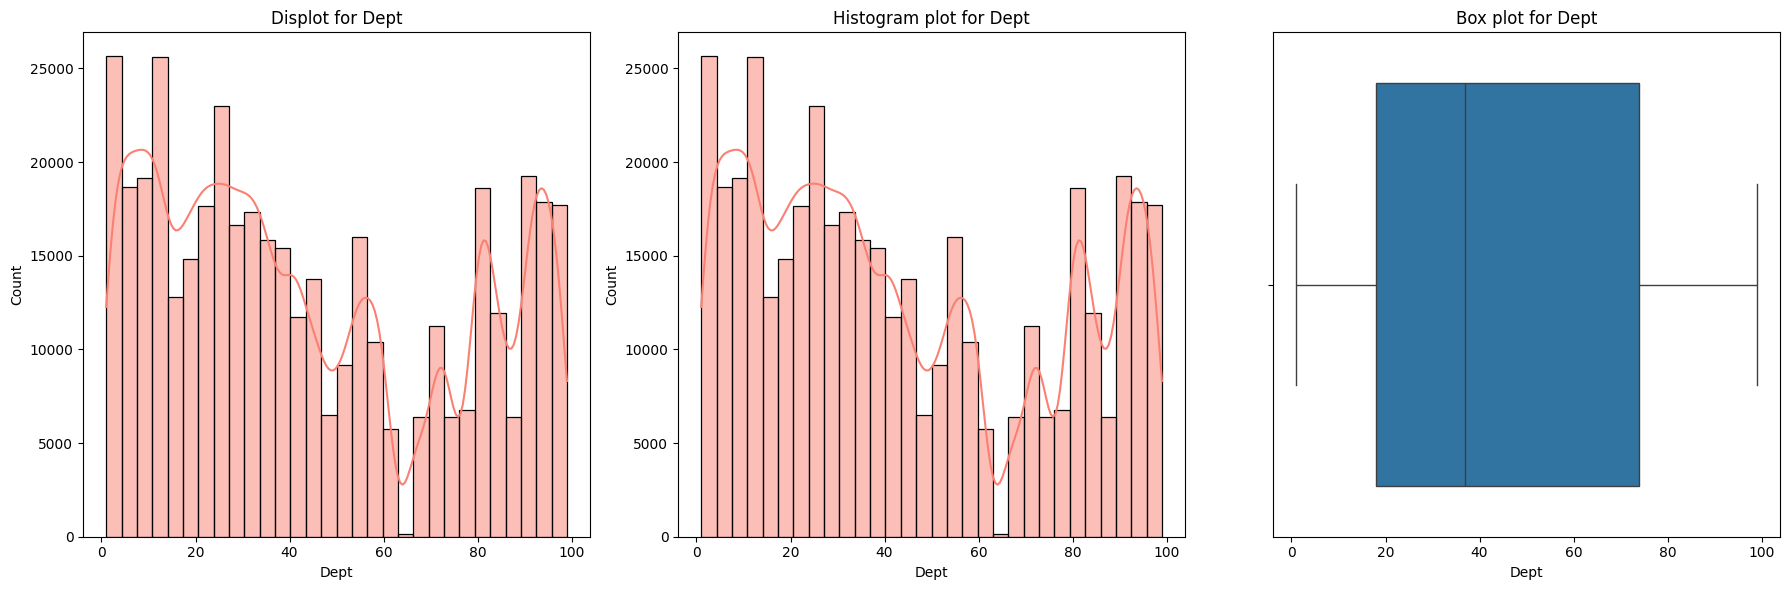

In [37]:
for i in df.columns:
    plot(df,i)

In [37]:
df.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'year', 'month', 'day',
       'week'],
      dtype='object')

In [38]:
# Add a small constant to avoid log(0)
def safe_log(x):
    return np.log(x + 1)

# Apply log transformation where appropriate
df['Weekly_Sales'] = safe_log(df['Weekly_Sales'])
df['MarkDown1'] = safe_log(df['MarkDown1'])
df['MarkDown2'] = safe_log(df['MarkDown2'])
df['MarkDown3'] = safe_log(df['MarkDown3'])
df['MarkDown4'] = safe_log(df['MarkDown4'])
df['MarkDown5'] = safe_log(df['MarkDown5'])
df['CPI'] = safe_log(df['CPI'])
df['Unemployment'] = safe_log(df['Unemployment'])
df['year'] = safe_log(df['year'])

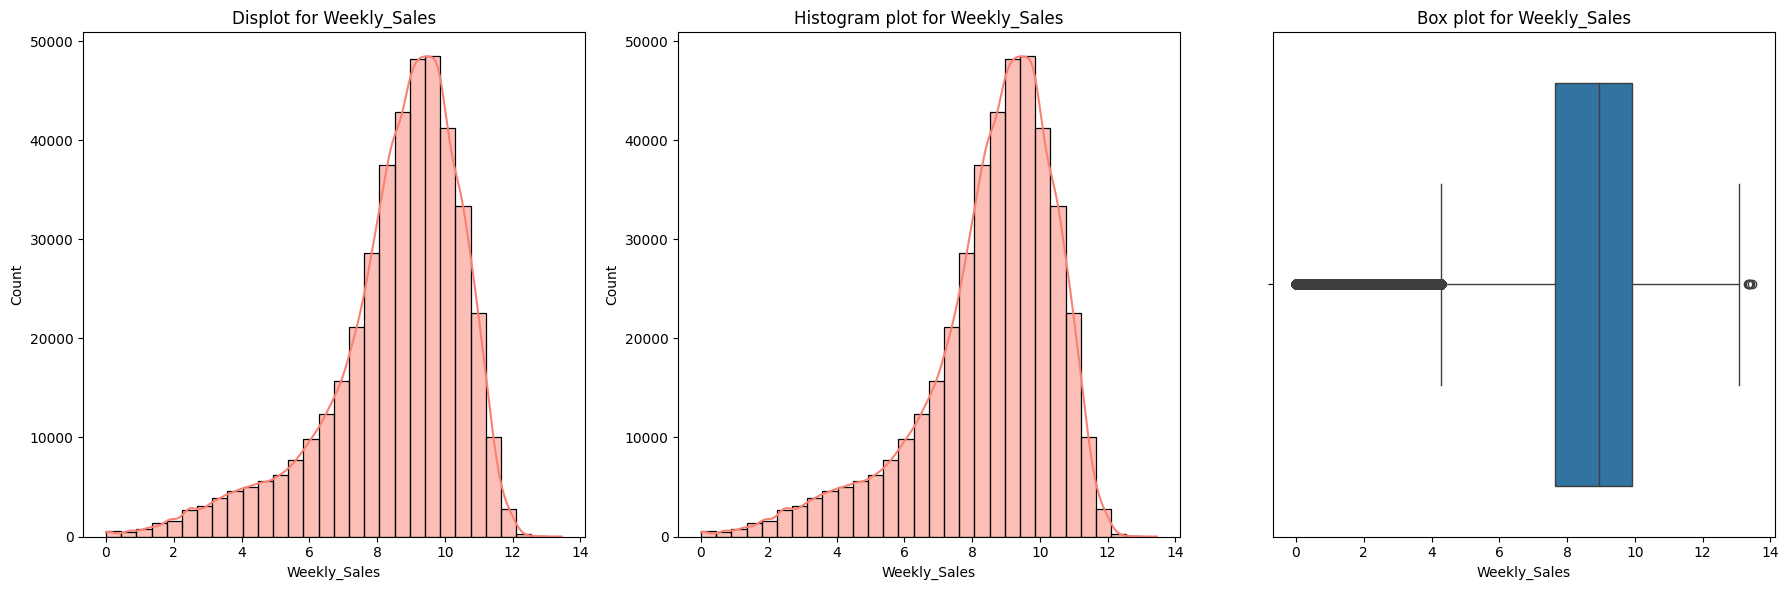

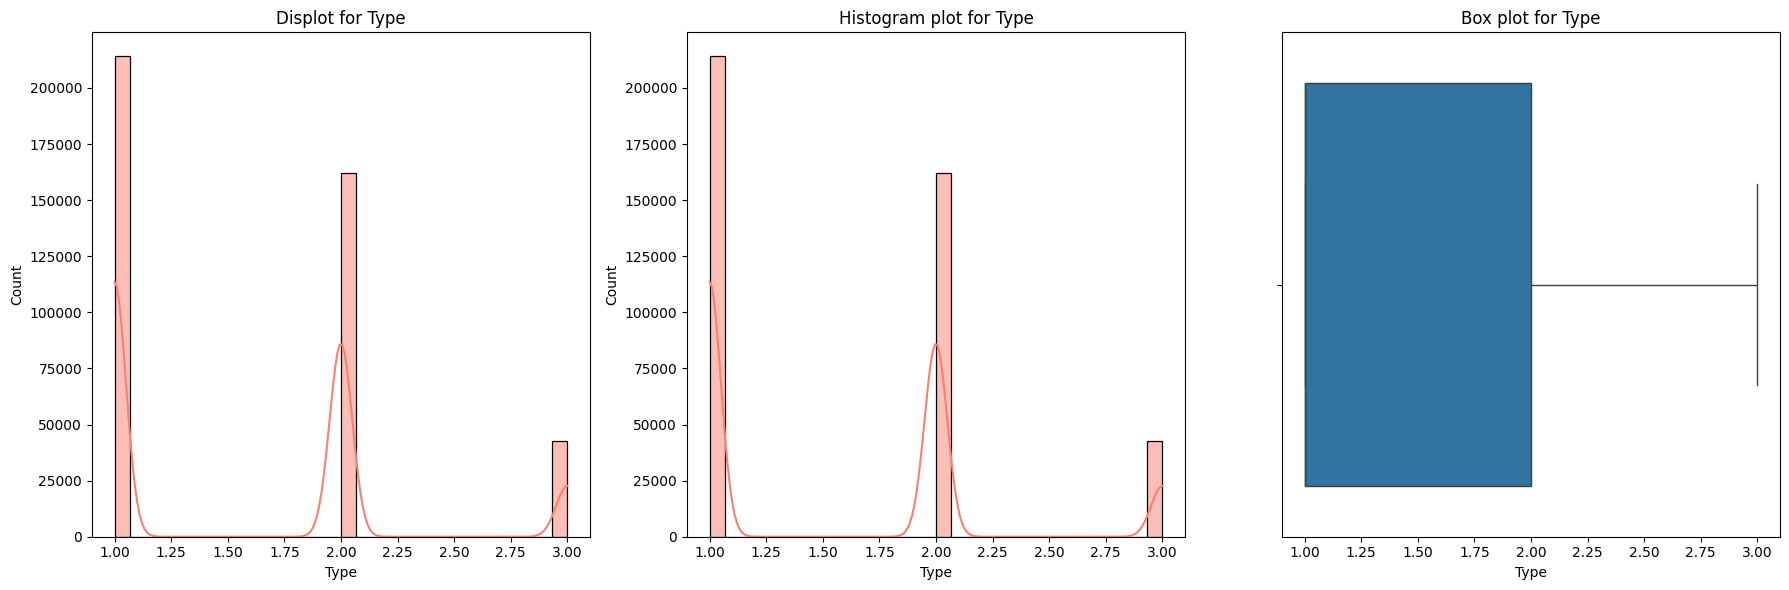

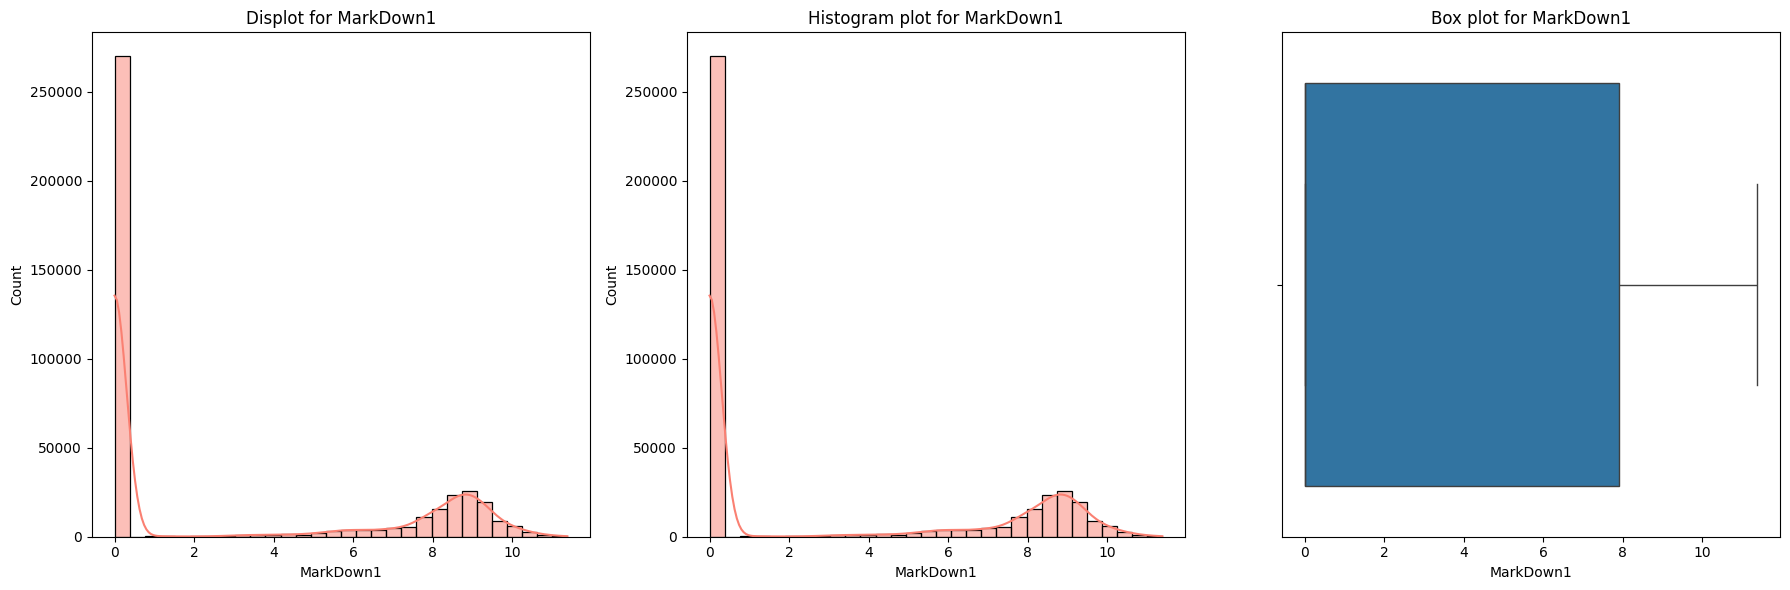

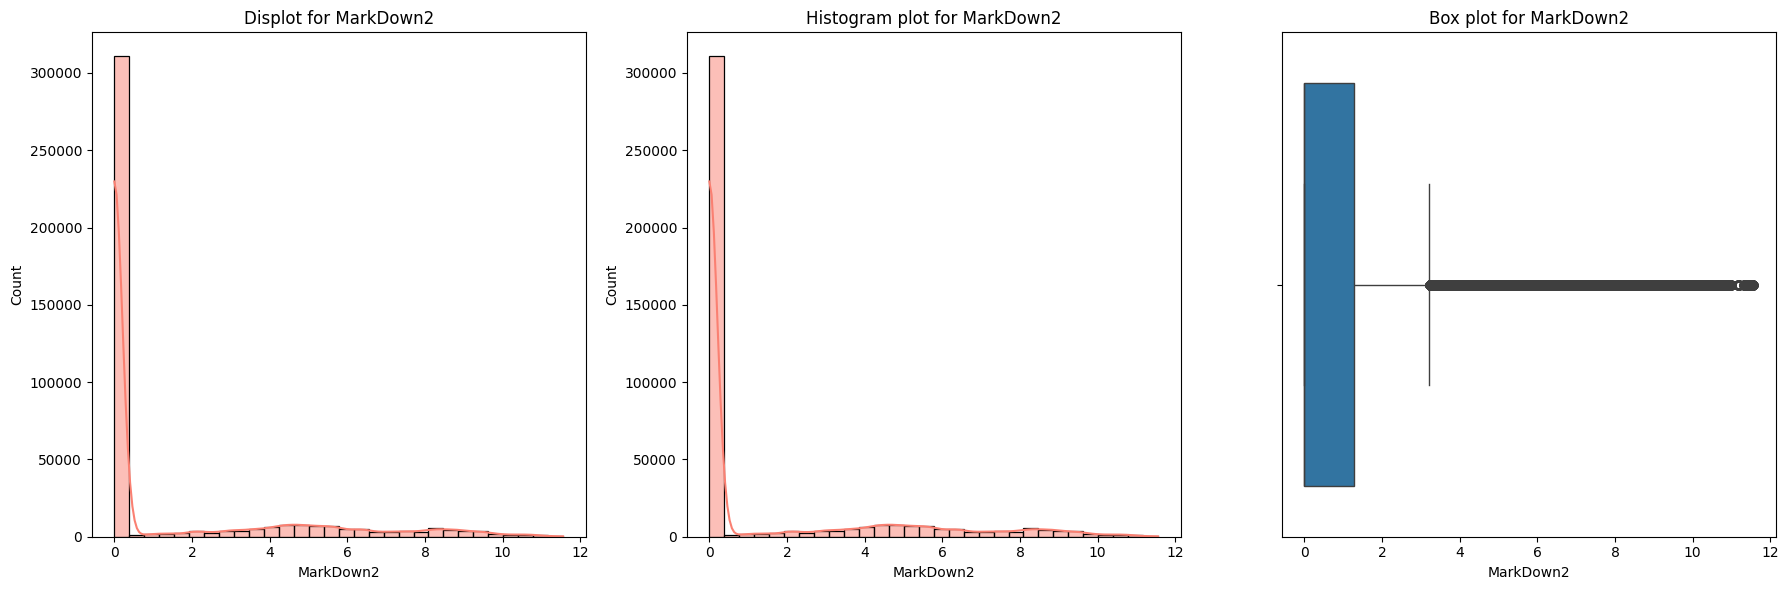

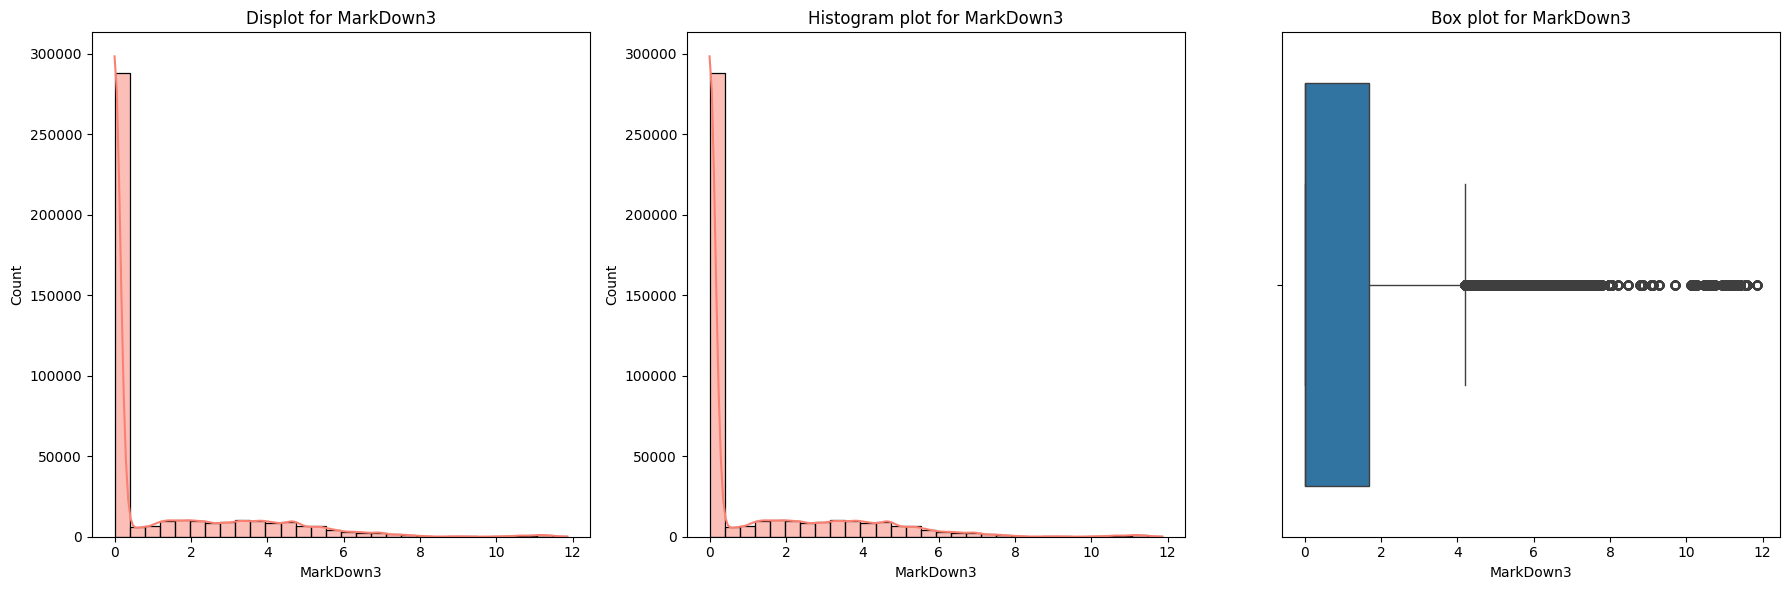

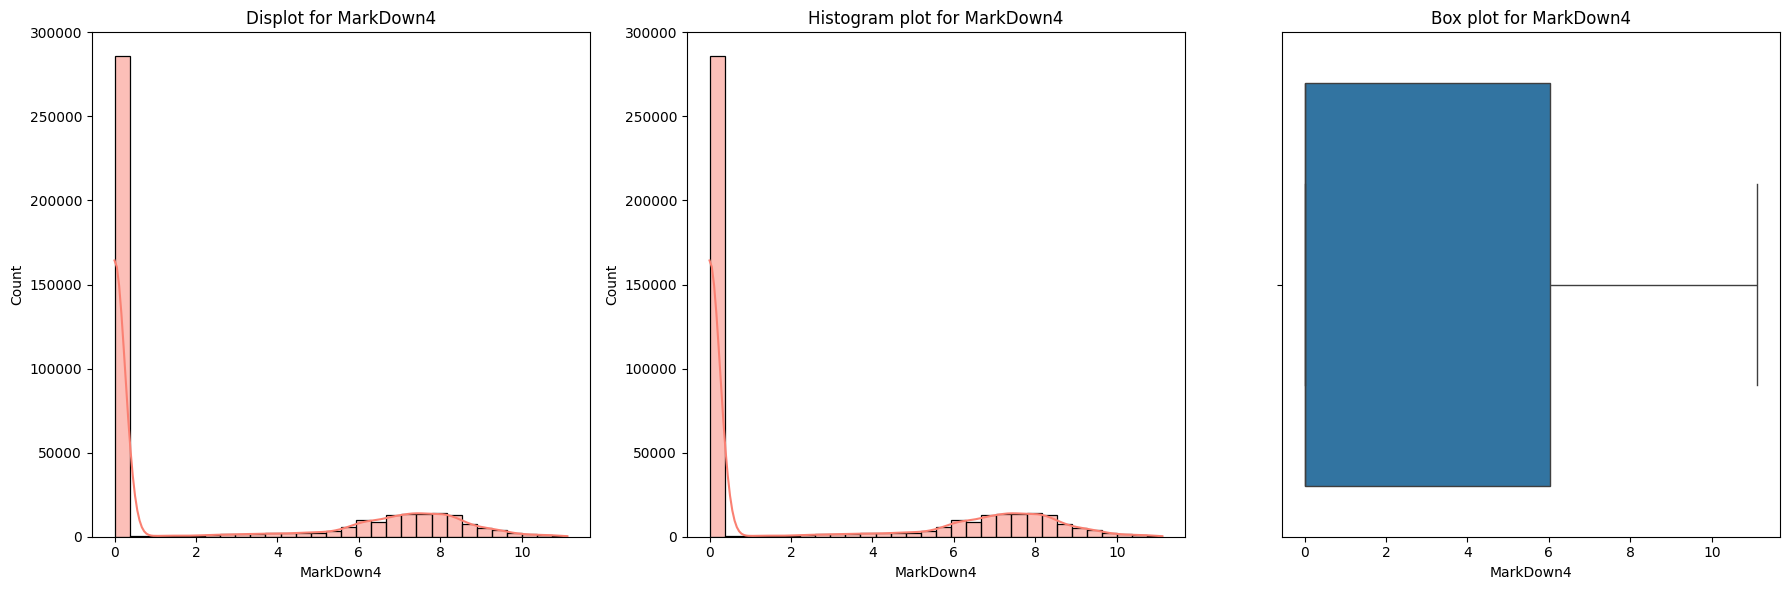

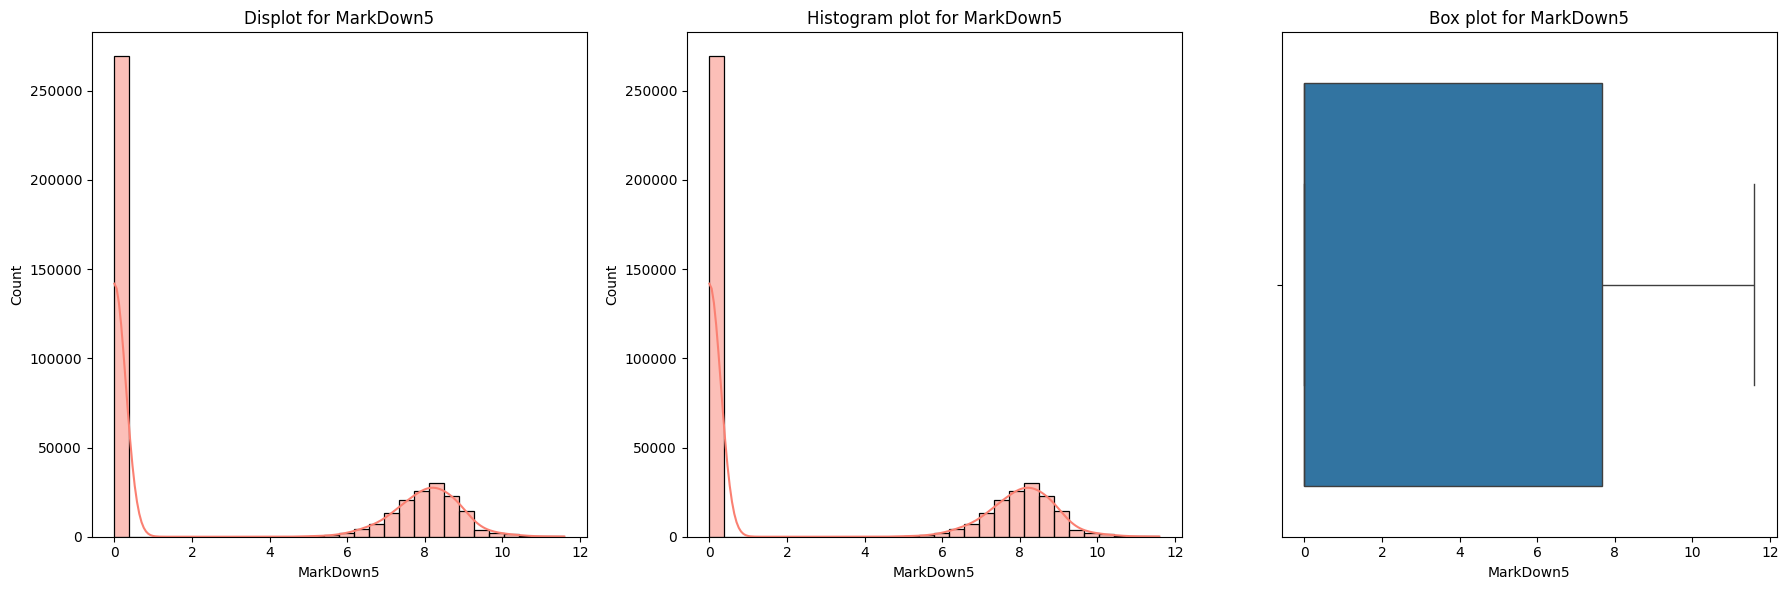

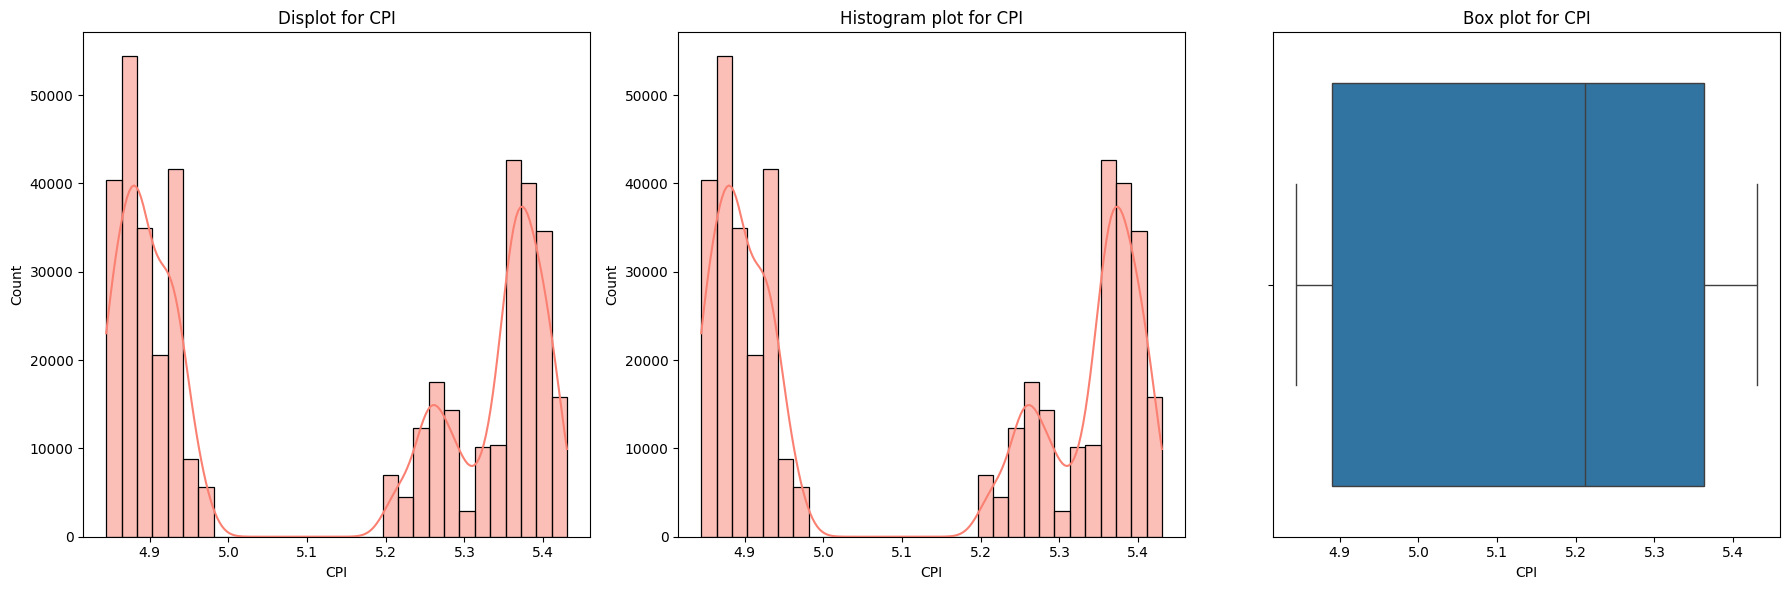

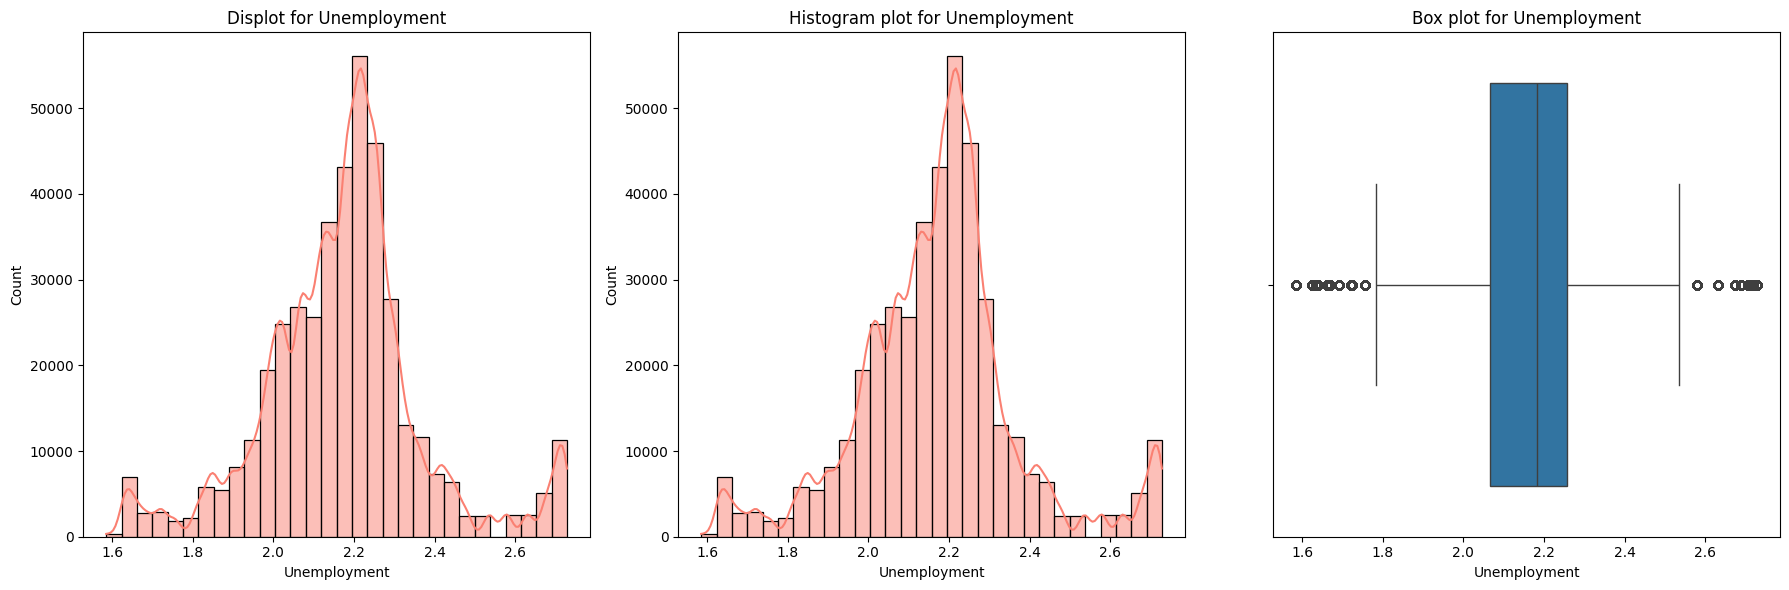

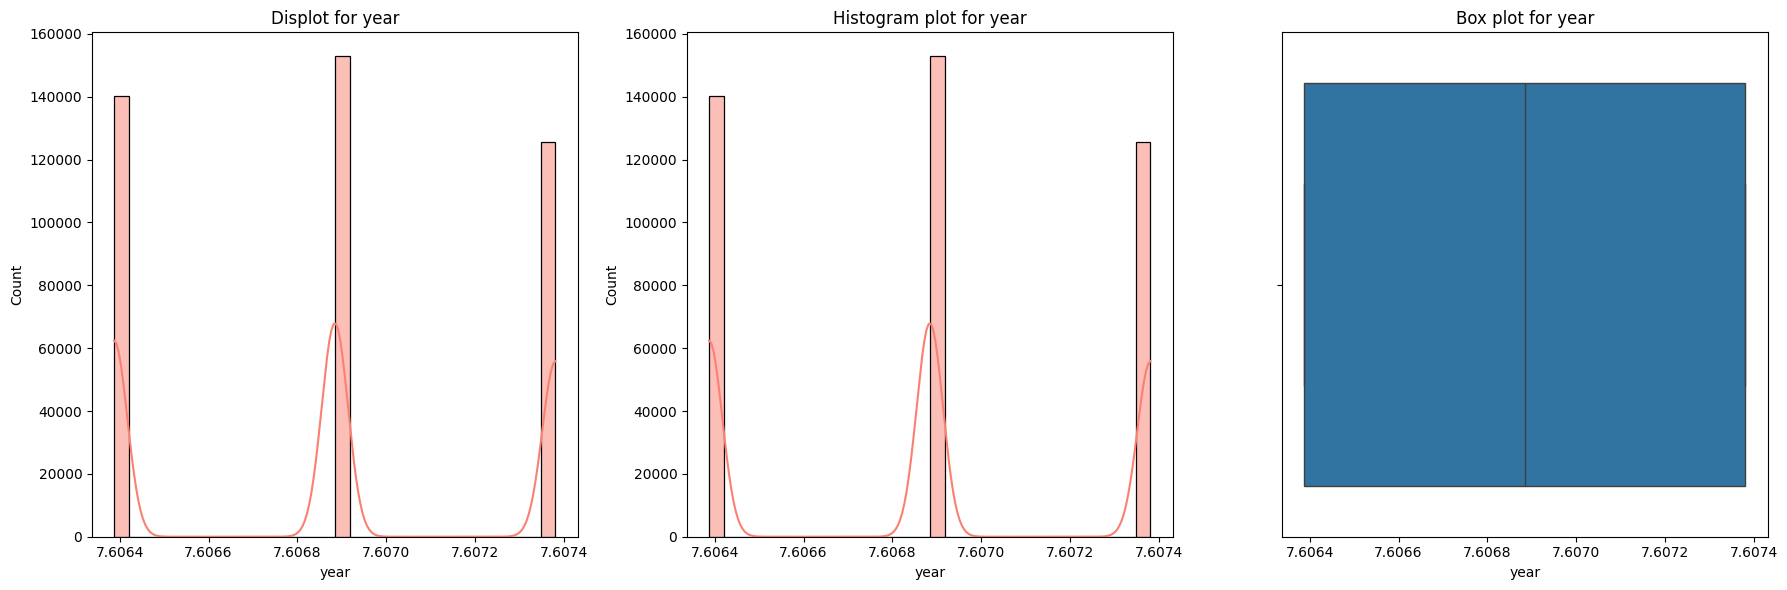

In [39]:
# using log transformation

skewed_columns = ['Weekly_Sales', 'Type', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'year']

for i in skewed_columns:
    plot(df,i)

In [39]:
# outliers handling using iqr method
def outlier(df,column):
  q1= df[column].quantile(0.25)
  q3= df[column].quantile(0.75)

  iqr= q3-q1

  upper_threshold= q3 + (1.5*iqr)
  lower_threshold= q1 - (1.5*iqr)

  df[column]= df[column].clip(lower_threshold, upper_threshold)

In [41]:
outlier_columns = ['Weekly_Sales', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'year']

for i in outlier_columns:
    outlier(df,i)

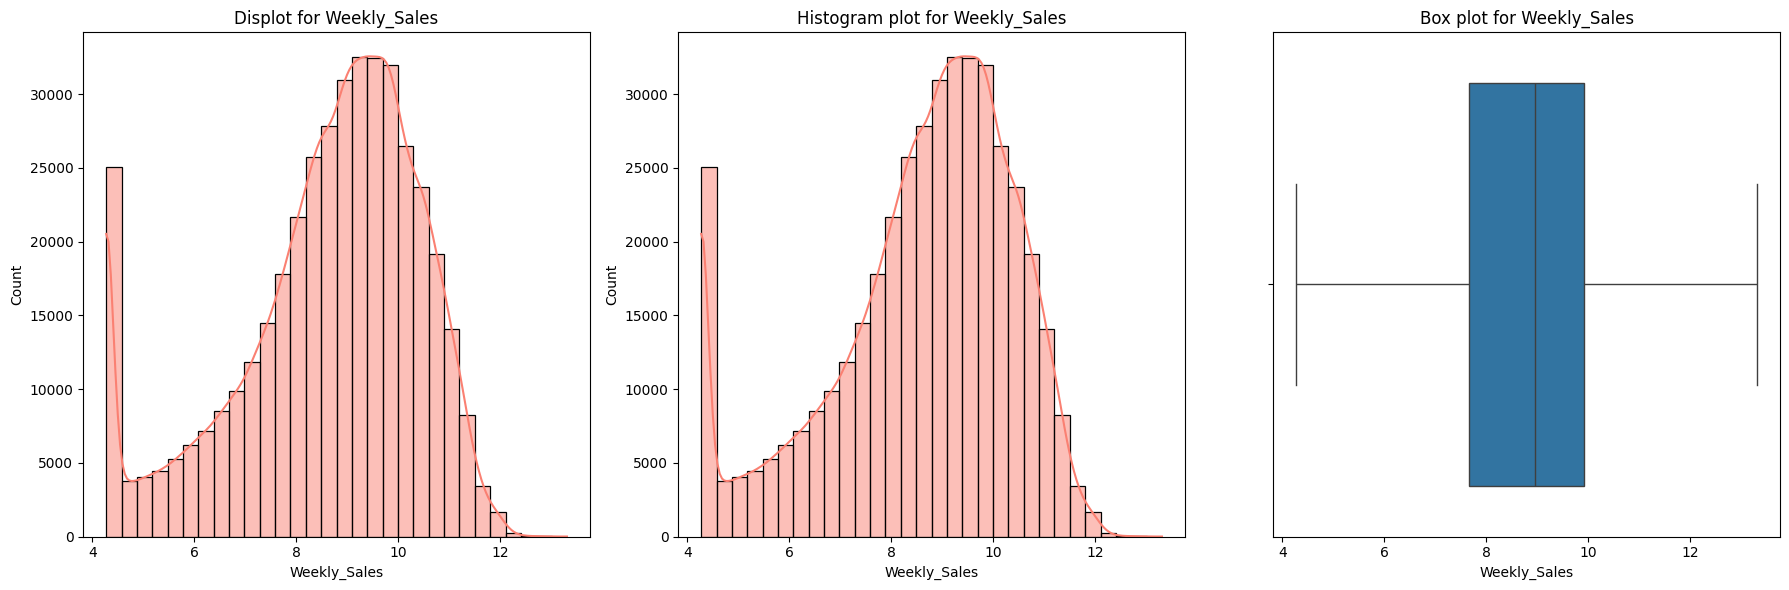

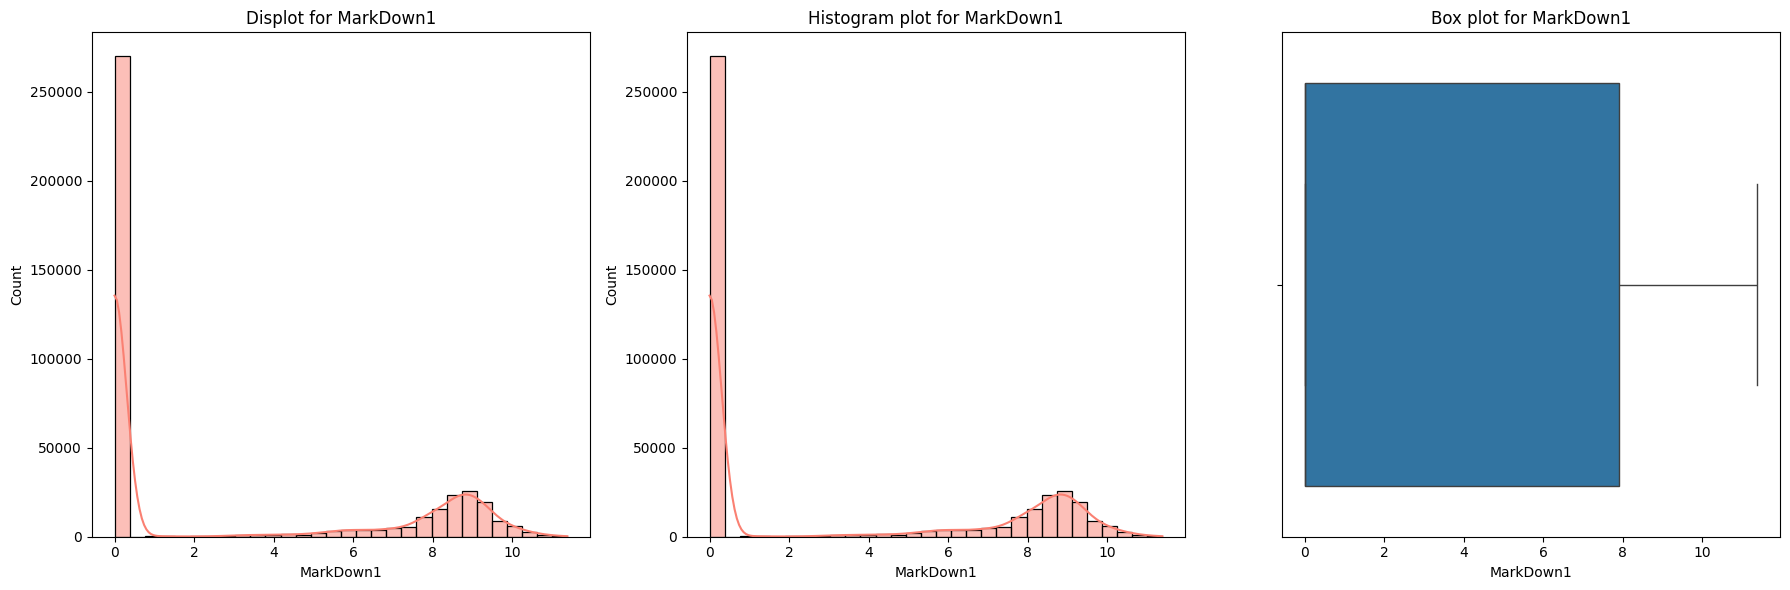

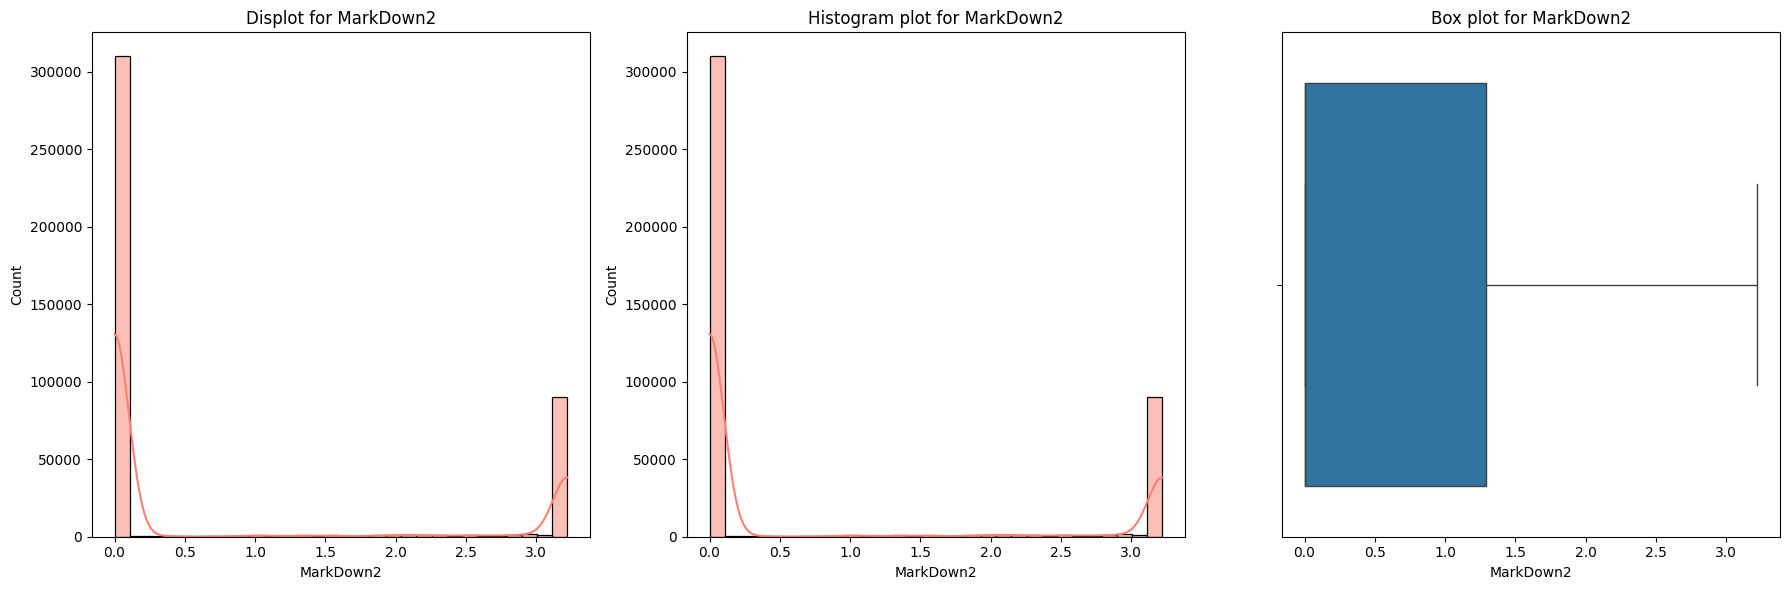

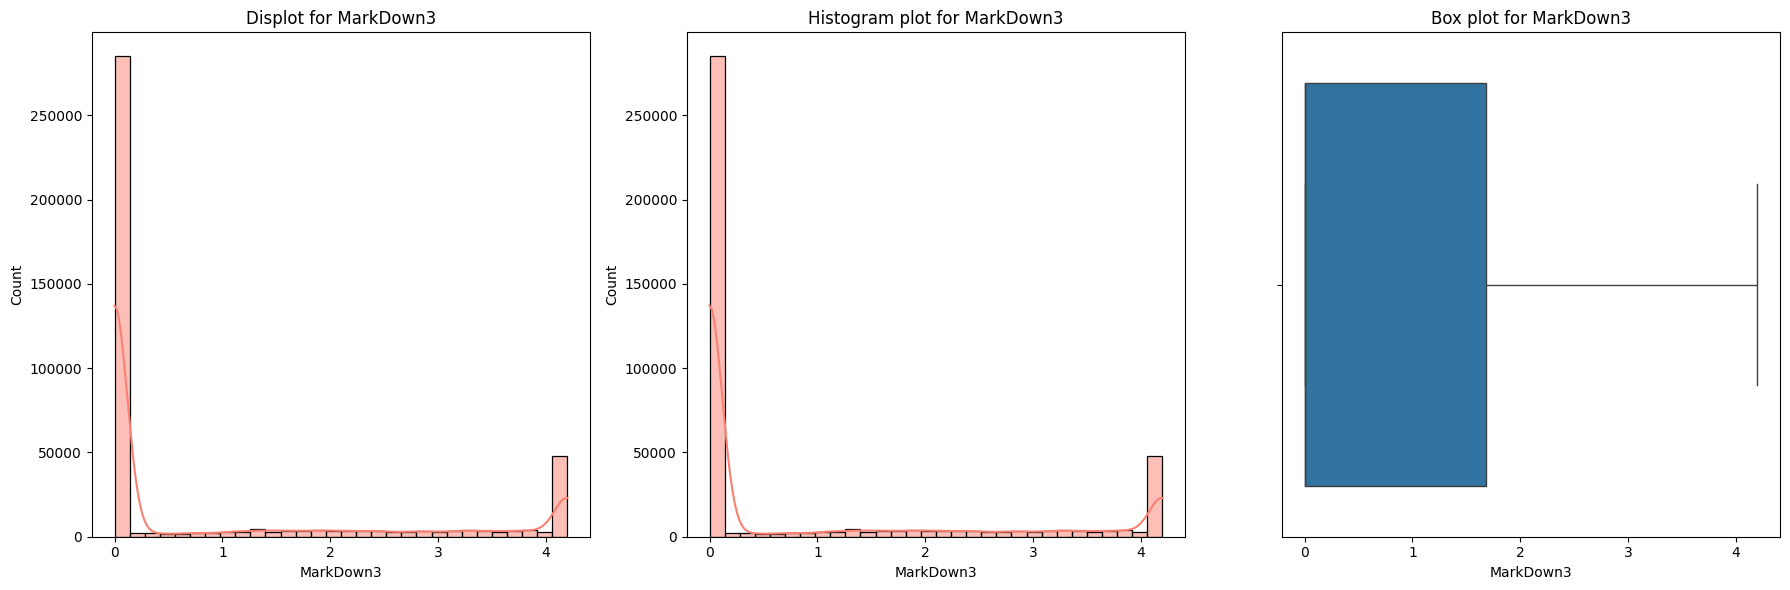

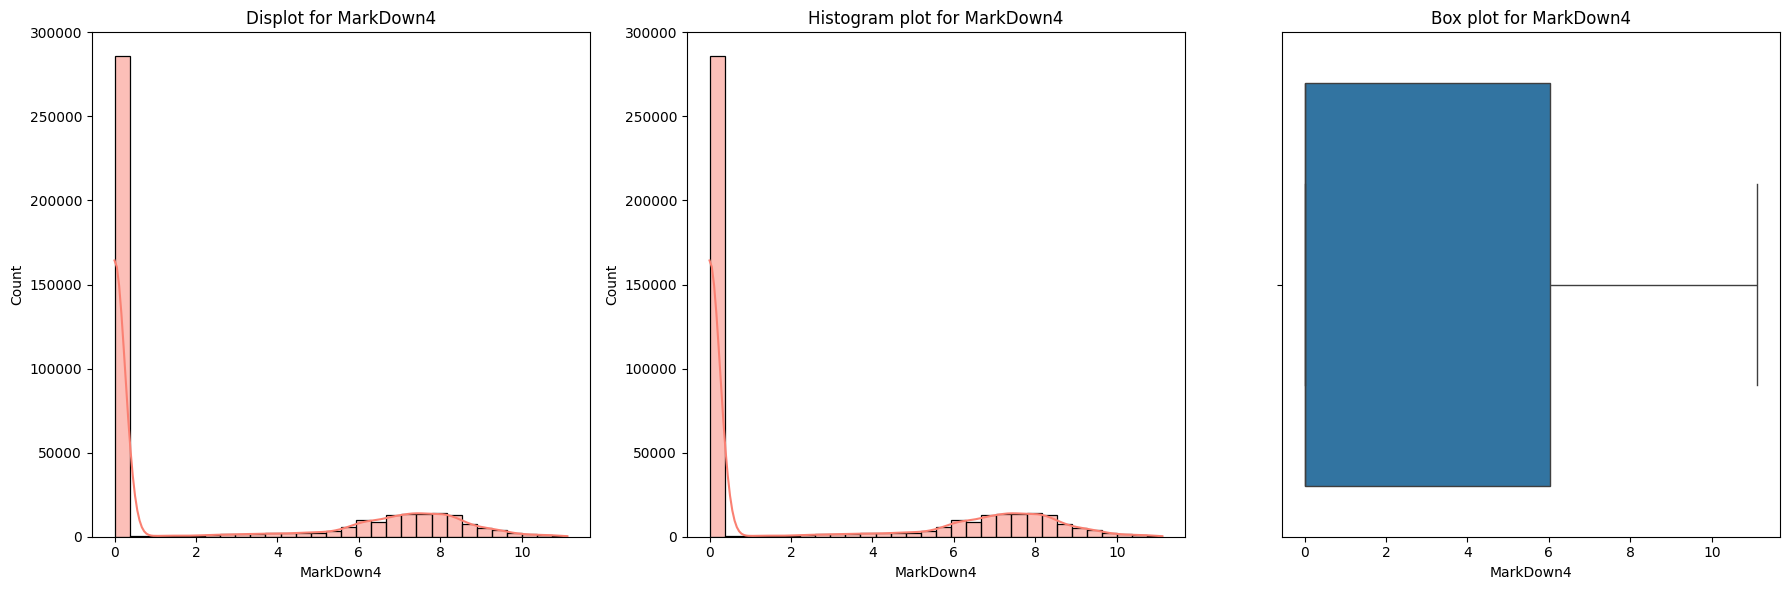

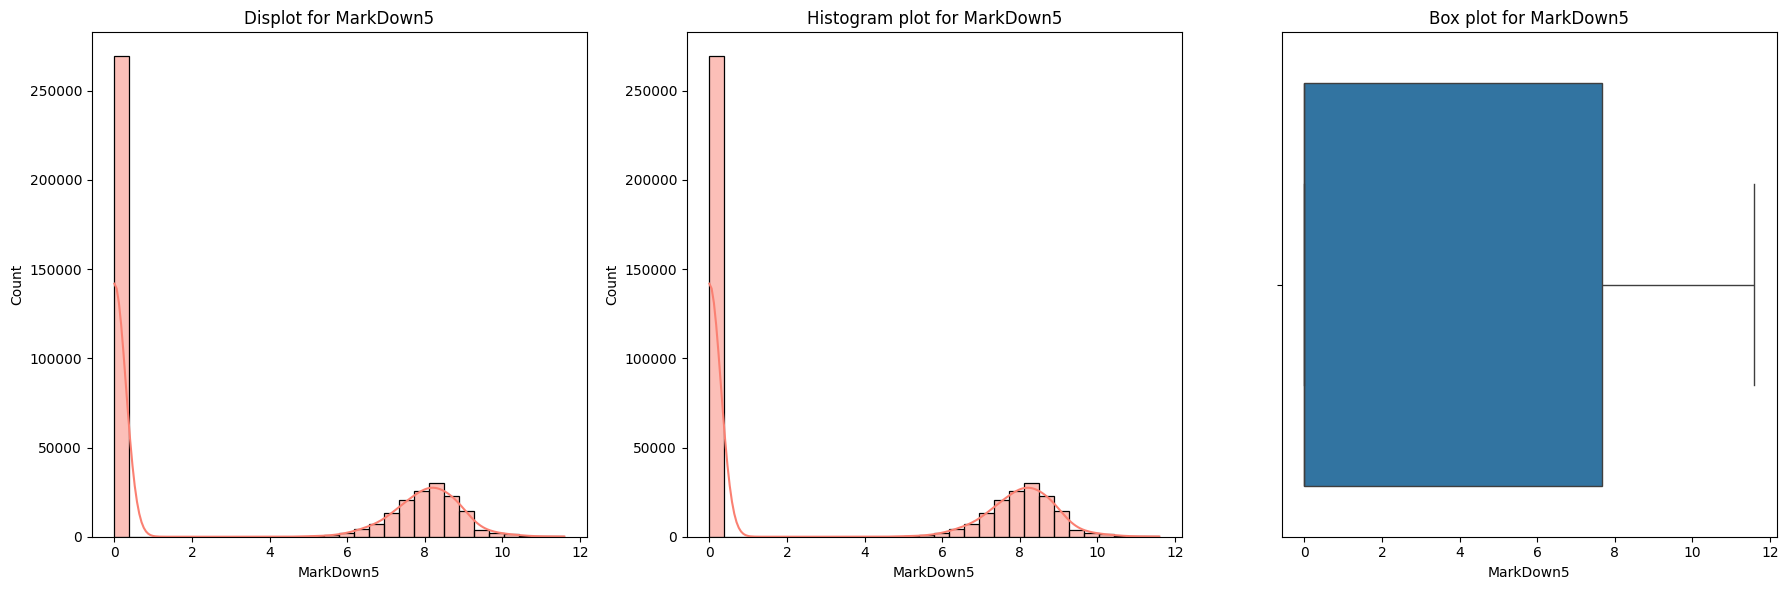

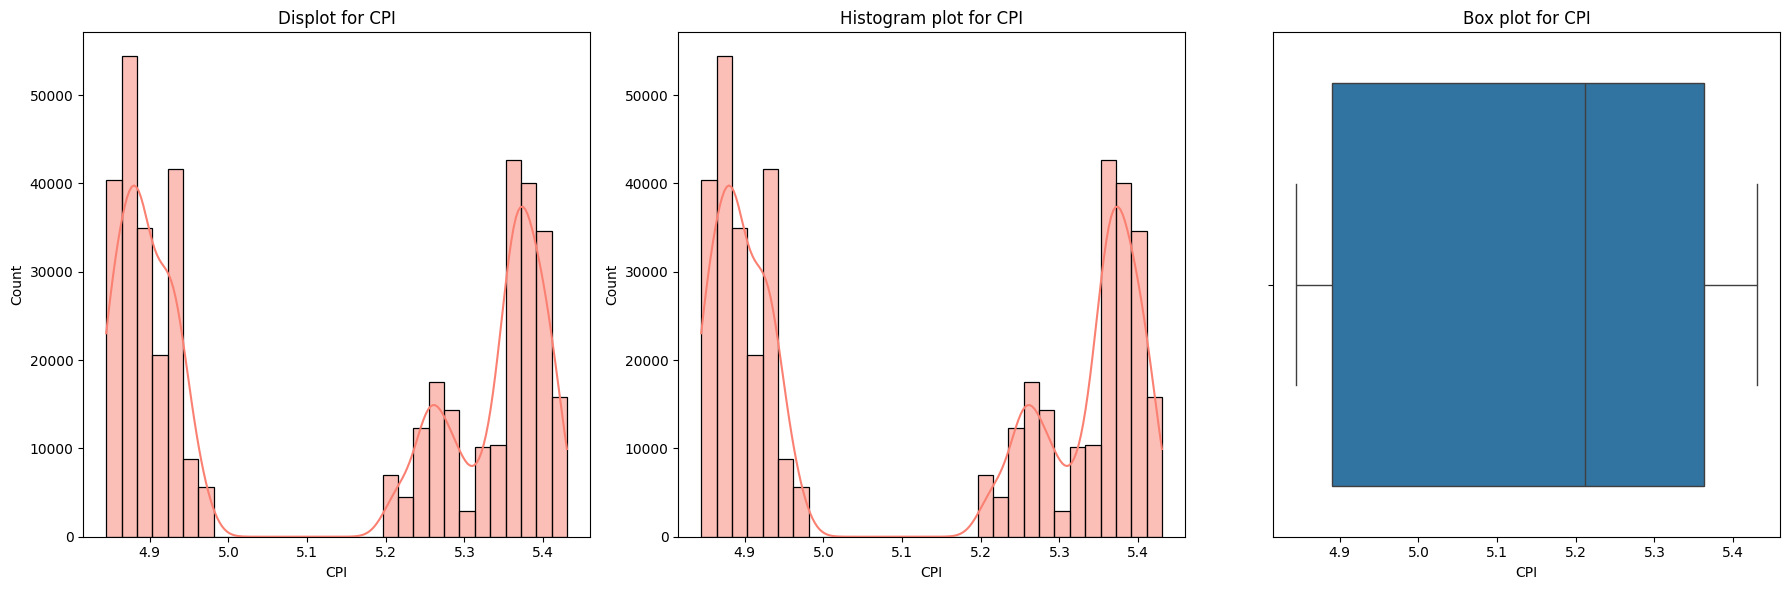

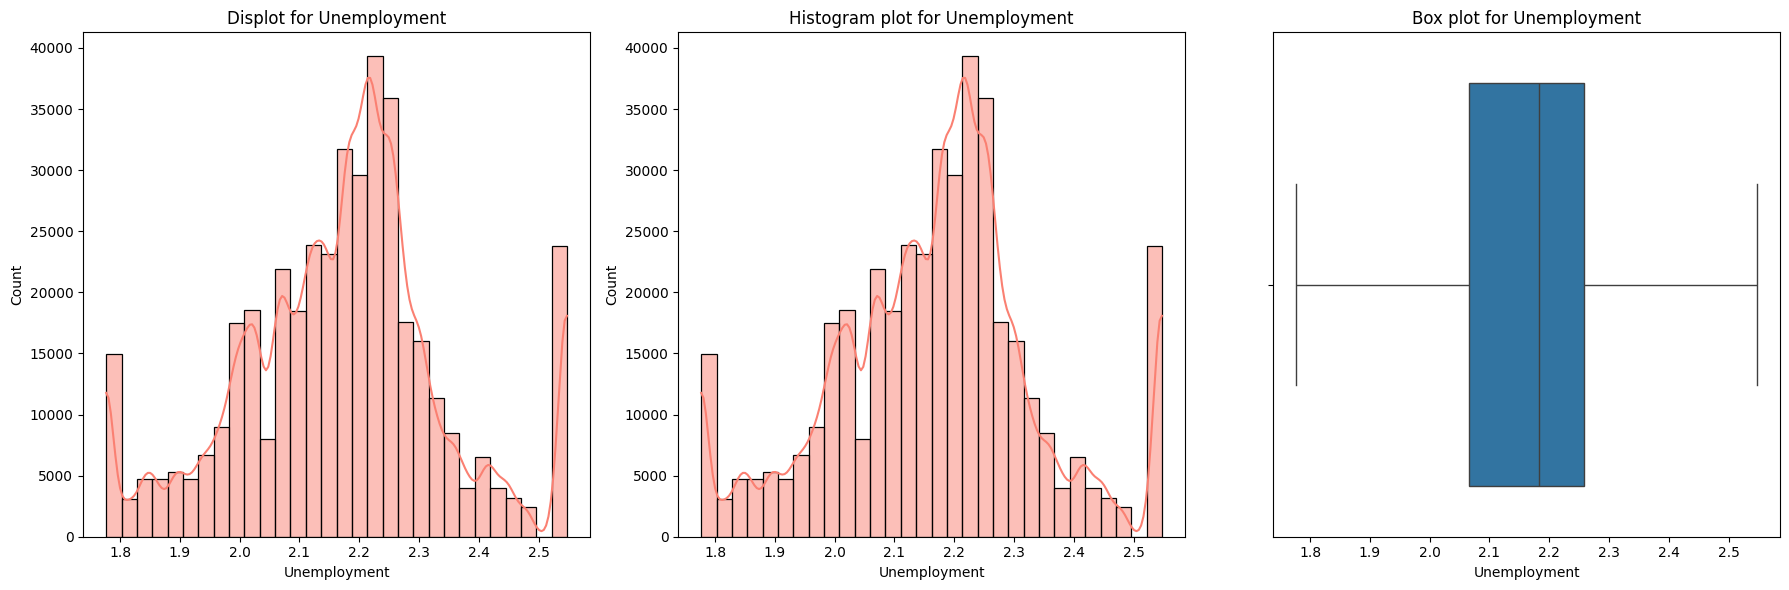

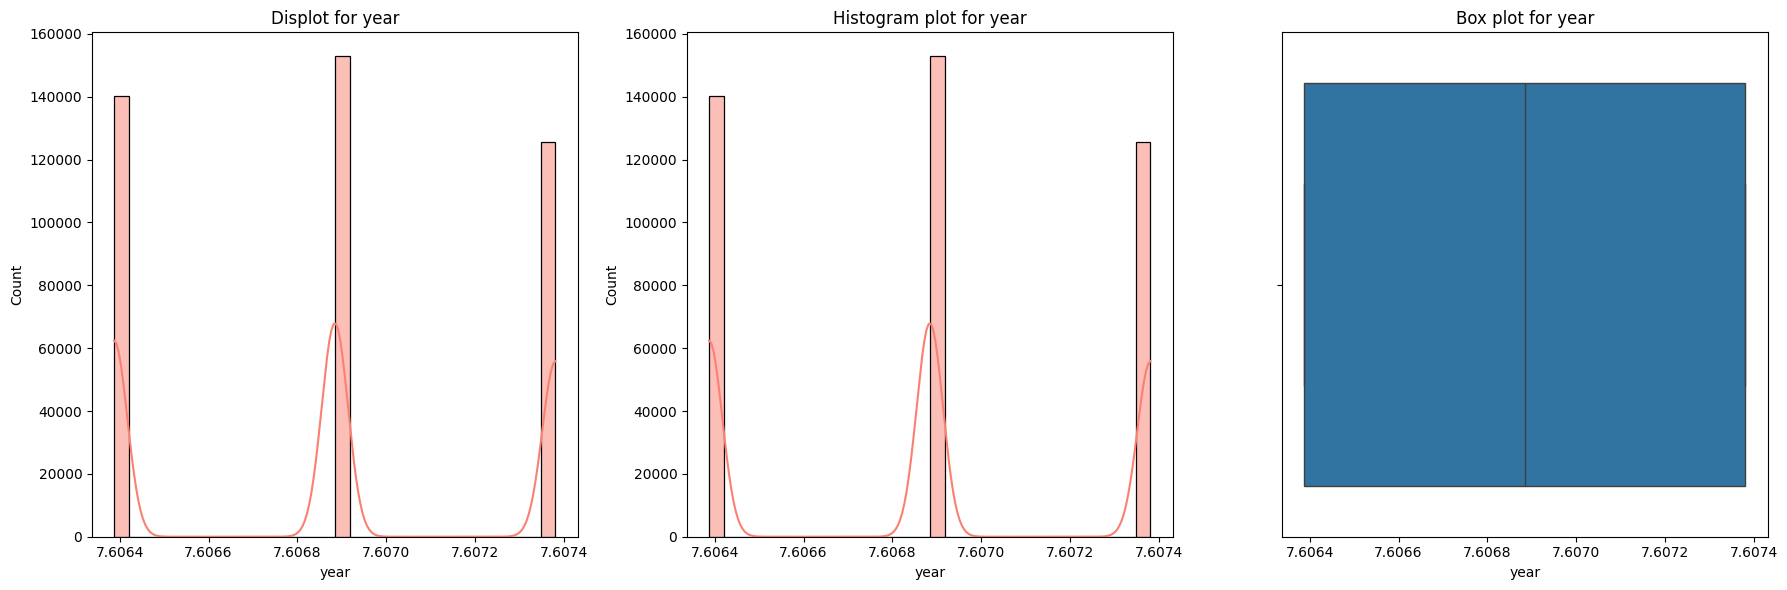

In [42]:
for j in outlier_columns:
    plot(df,j)

In [40]:
df.describe()

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,month,day,week
count,418660.000000,418660.000000,418660.000000,418660.000000,418660.000000,418660.000000,418660.000000,418660.000000,418660.000000,418660.000000,418660.000000,418660.000000,418660.000000,418660.000000,418660.000000,418660.000000,418660.000000,418660.000000,418660.0
mean,22.199651,44.243840,8.526589,0.069968,1.590061,136695.373260,60.062170,3.359362,2.901597,1.451797,1.110809,2.235967,2.877797,5.122340,2.172789,7.606867,6.449778,15.672737,25.827043
std,12.790081,30.508595,2.023922,0.255094,0.666926,61009.540433,18.440017,0.458406,4.019295,2.764674,2.011650,3.423547,3.897532,0.230028,0.198924,0.000396,3.245994,8.751080,14.164722
min,1.000000,1.000000,0.000000,0.000000,1.000000,34875.000000,5.540000,2.472000,0.000000,0.000000,0.000000,0.000000,0.000000,4.844691,1.584940,7.606387,1.000000,1.000000,1.0
25%,11.000000,18.000000,7.657990,0.000000,1.000000,93638.000000,46.660000,2.931000,0.000000,0.000000,0.000000,0.000000,0.000000,4.890520,2.065723,7.606387,4.000000,8.000000,14.0
50%,22.000000,37.000000,8.943645,0.000000,1.000000,140167.000000,62.070000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,5.211402,2.182224,7.606885,6.000000,16.000000,26.0
75%,33.000000,74.000000,9.916753,0.000000,2.000000,202505.000000,74.250000,3.735000,7.921136,1.289233,1.678964,6.031550,7.672265,5.363248,2.258320,7.607381,9.000000,23.000000,38.0
max,45.000000,99.000000,13.448930,1.000000,3.000000,219622.000000,100.140000,4.468000,11.392426,11.557139,11.860985,11.119525,11.594692,5.430366,2.728702,7.607381,12.000000,31.000000,52.0


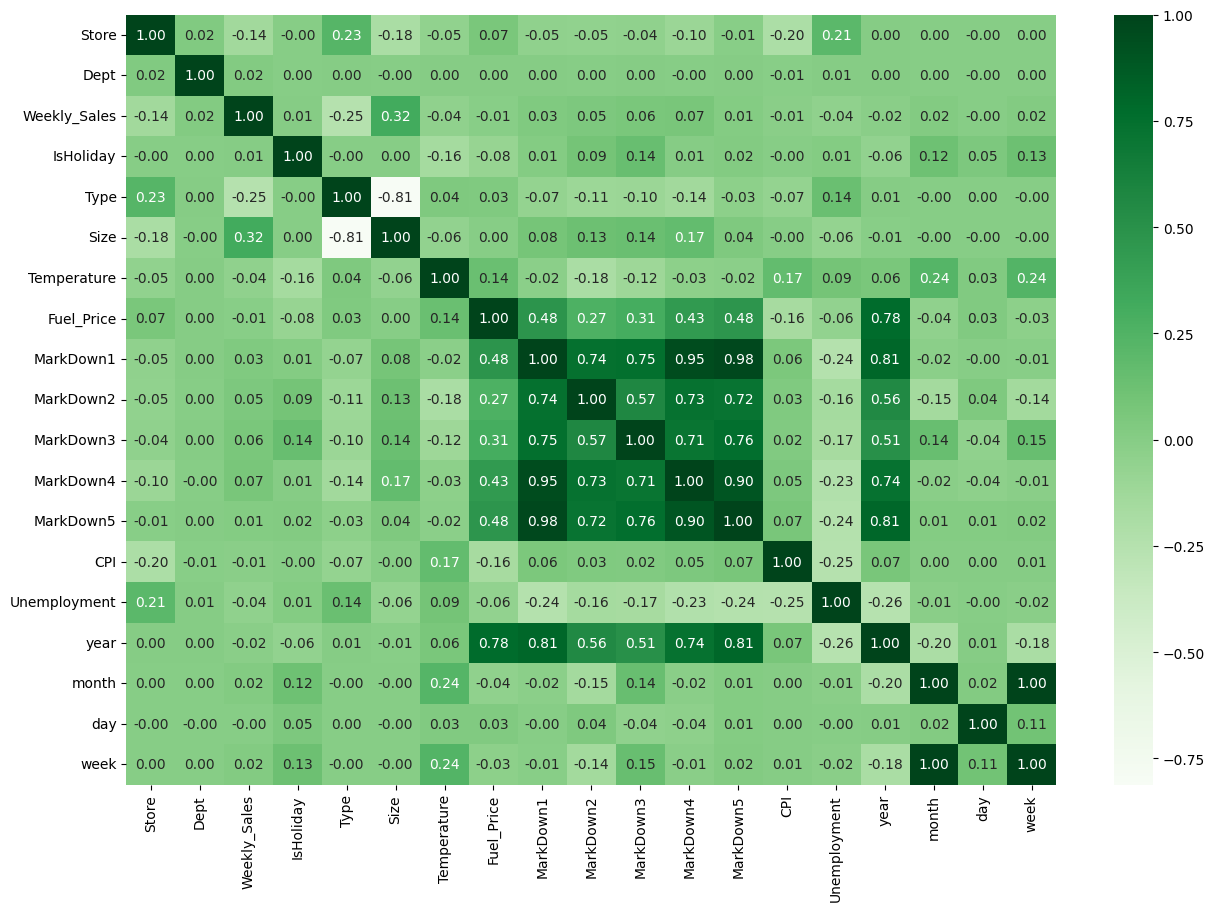

In [41]:
# Checking the Correlation using heatmap after outliers
df_corr= df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(df_corr,annot= True, cmap="Greens", fmt=".2f")
plt.show()

In [42]:
# checking duplicates
df.duplicated().sum()

np.int64(0)

In [43]:
df.to_csv("Retail_sales_prediction",index=False)

In [44]:
df.tail()

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,year,month,day,week
421565,45,98,6.233175,0,2,118221,64.88,3.997,8.424554,3.074543,0.916291,7.379014,8.098415,5.262760,2.270475,7.607381,9,28,39
421566,45,98,6.444290,0,2,118221,64.89,3.985,8.526696,0.000000,2.986692,7.720652,7.758338,5.263573,2.268718,7.607381,10,5,40
421567,45,98,6.967928,0,2,118221,54.47,4.000,7.579311,0.000000,2.184927,6.397463,8.291932,5.264384,2.268718,7.607381,10,12,41
421568,45,98,6.634646,0,2,118221,56.47,3.969,7.603409,0.000000,1.430311,6.083884,7.338557,5.264403,2.268718,7.607381,10,19,42
421569,45,98,6.982677,0,2,118221,58.85,3.882,8.299015,4.078892,4.615121,5.361010,6.756153,5.264289,2.268718,7.607381,10,26,43


In [45]:
# dataset is ready and we can go for ML regression model

# importing the ml packages

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


In [48]:

def evaluate_model(df, algorithm):
    # Prepare features and target variable
    x = df.drop(columns=['Weekly_Sales','MarkDown1', 'MarkDown2', 'MarkDown3','MarkDown4', 'MarkDown5'])
    y = df['Weekly_Sales']

    
    # Split the data into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=40)
    
    # Initialize and fit the model
    model = algorithm()
    model.fit(X_train, Y_train)
    
    # Predict on both training and testing sets
    Y_pred_train = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    
    # Evaluating Model Performance
    train_mse = mean_squared_error(Y_train, Y_pred_train)
    test_mse = mean_squared_error(Y_test, Y_pred_test)

    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)

    train_mae = mean_absolute_error(Y_train, Y_pred_train)
    test_mae = mean_absolute_error(Y_test, Y_pred_test)

    train_r2 = r2_score(Y_train, Y_pred_train)
    test_r2 = r2_score(Y_test, Y_pred_test)
    
    # Create a dictionary for training metrics
    metrics_train = {
        "Data": "Train Data",
        "Name": model.__class__.__name__,  # Use the class name of the algorithm
        "R2_score": train_r2,
        "Mean_squared_error": train_mse,
        "Root_mean_squared_error": train_rmse,
        "Mean_absolute_error": train_mae
    }

    # Create a dictionary for test metrics
    metrics_test = {
        "Data": "Test Data",
        "Name": model.__class__.__name__,  # Use the class name of the algorithm
        "R2_score": test_r2,
        "Mean_squared_error": test_mse,
        "Root_mean_squared_error": test_rmse,
        "Mean_absolute_error": test_mae
    }

    # Print the metrics for training and test data
    print("Training Metrics:")
    print(metrics_train)
    print("\nTesting Metrics:")
    print(metrics_test)
    print("")  # For better readability


In [ ]:
evaluate_model(df,LinearRegression)
evaluate_model(df,DecisionTreeRegressor)
evaluate_model(df,RandomForestRegressor)
evaluate_model(df,XGBRegressor)

In [51]:
# RandomForestClassifier is good interpretability

'''x = df.drop(columns=['Weekly_Sales'])
y = df['Weekly_Sales']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=40)

# Initialize and fit the model
model = RandomForestRegressor()
model.fit(X_train, Y_train)

#predicting the model
Y_pred_test = model.predict(X_test)
    
test_mse= mean_squared_error(Y_test, Y_pred_test)
test_rmse= np.sqrt(test_mse)
test_mae= mean_absolute_error(Y_test, Y_pred_test)
test_r2= r2_score(Y_test, Y_pred_test)

metrics_test = {
    "Data": "Test Data",
    "Name": RandomForestRegressor.__name__ ,# Use the class name of the algorithm
    "R2_score": test_r2,
    "Mean_squared_error": test_mse,
    "Root_mean_squared_error": test_rmse,
    "Mean_absolute_error": test_mae
}

print(metrics_test)'''

'x = df.drop(columns=[\'Weekly_Sales\'])\ny = df[\'Weekly_Sales\']\n\n# Split the data into training and testing sets\nX_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=40)\n\n# Initialize and fit the model\nmodel = RandomForestRegressor()\nmodel.fit(X_train, Y_train)\n\n#predicting the model\nY_pred_test = model.predict(X_test)\n    \ntest_mse= mean_squared_error(Y_test, Y_pred_test)\ntest_rmse= np.sqrt(test_mse)\ntest_mae= mean_absolute_error(Y_test, Y_pred_test)\ntest_r2= r2_score(Y_test, Y_pred_test)\n\nmetrics_test = {\n    "Data": "Test Data",\n    "Name": RandomForestRegressor.__name__ ,# Use the class name of the algorithm\n    "R2_score": test_r2,\n    "Mean_squared_error": test_mse,\n    "Root_mean_squared_error": test_rmse,\n    "Mean_absolute_error": test_mae\n}\n\nprint(metrics_test)'

In [52]:
#df.iloc[104546]

In [53]:

#np.exp(9.05)

In [54]:
'''user = np.array([[11.0,71.0,0.0,1.0,207499.0,79.07,3.749,9.796811,0.0,4.19741,9.137754,8.321417,5.42133,2.036534,7.607381,5.0,4.0,18.0]])
y_pred = model.predict(user)
y_pred[0]'''


'user = np.array([[11.0,71.0,0.0,1.0,207499.0,79.07,3.749,9.796811,0.0,4.19741,9.137754,8.321417,5.42133,2.036534,7.607381,5.0,4.0,18.0]])\ny_pred = model.predict(user)\ny_pred[0]'

In [55]:
np.exp(9.144970598585447)

np.float64(9367.210248199495)

In [56]:
# saving the model using pickle
'''with open("Retail_sales_prediction","wb") as x:
    pickle.dump(model,x)'''

'with open("Retail_sales_prediction","wb") as x:\n    pickle.dump(model,x)'

In [57]:
'''with open("Retail_sales_prediction","rb") as x1:
    reg = pickle.load(x1)'''

'with open("Retail_sales_prediction","rb") as x1:\n    reg = pickle.load(x1)'

In [51]:
# RandomForestClassifier is good interpretability

x = df.drop(columns=['Weekly_Sales','MarkDown1', 'MarkDown2', 'MarkDown3','MarkDown4', 'MarkDown5'])
y = df['Weekly_Sales']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=40)

# Initialize and fit the model
model = RandomForestRegressor()
model.fit(X_train, Y_train)

#predicting the model
Y_pred_test = model.predict(X_test)
    
test_mse= mean_squared_error(Y_test, Y_pred_test)
test_rmse= np.sqrt(test_mse)
test_mae= mean_absolute_error(Y_test, Y_pred_test)
test_r2= r2_score(Y_test, Y_pred_test)

metrics_test = {
    "Data": "Test Data",
    "Name": RandomForestRegressor.__name__ ,# Use the class name of the algorithm
    "R2_score": test_r2,
    "Mean_squared_error": test_mse,
    "Root_mean_squared_error": test_rmse,
    "Mean_absolute_error": test_mae
}

print(metrics_test)

{'Data': 'Test Data', 'Name': 'RandomForestRegressor', 'R2_score': 0.9753570605201602, 'Mean_squared_error': np.float64(0.1012488291696053), 'Root_mean_squared_error': np.float64(0.3181962117461572), 'Mean_absolute_error': np.float64(0.1636120838212521)}


In [52]:
with open("Retail_sales_prediction","wb") as x:
    pickle.dump(model,x)

In [ ]:
with open("Retail_sales_prediction","rb") as x1:
    reg = pickle.load(x1)